### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Reading and Understanding data

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
#reading data

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


no missing values in dataset

In [6]:
#replacing column names

bike.rename(columns = {'yr' : 'year', 'mnth': 'month', 'hum':'humidity','cnt':'Count'}, inplace = True)
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#mapping the variables

bike['season']= bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['month']= bike.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
bike.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
Count         695
instant       730
dteday        730
dtype: int64

#### visualising numeric variables

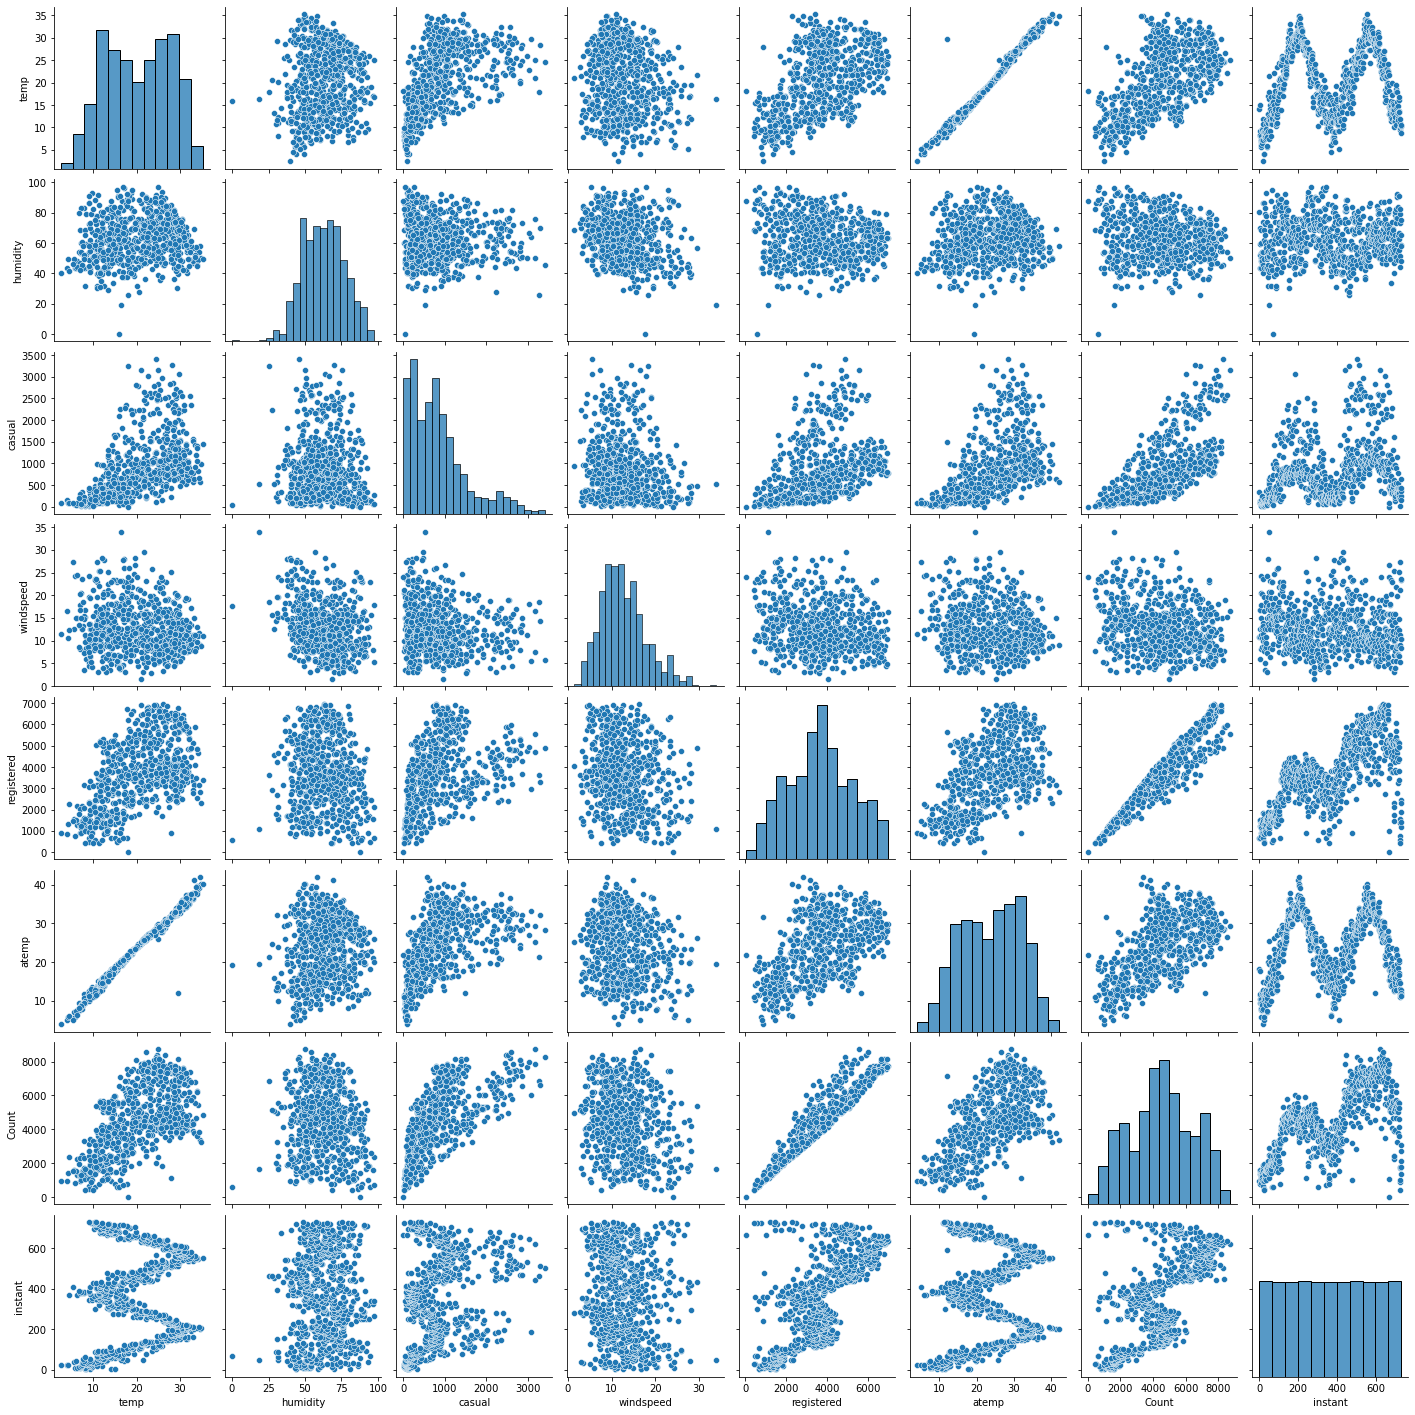

In [10]:
sns.pairplot(bike, vars=['temp', 'humidity', 'casual', 'windspeed', 'registered', 'atemp', 'Count', 'instant'])
plt.show()

Bike rentals are more correlated to temperature


### Visualising Categorical Variables

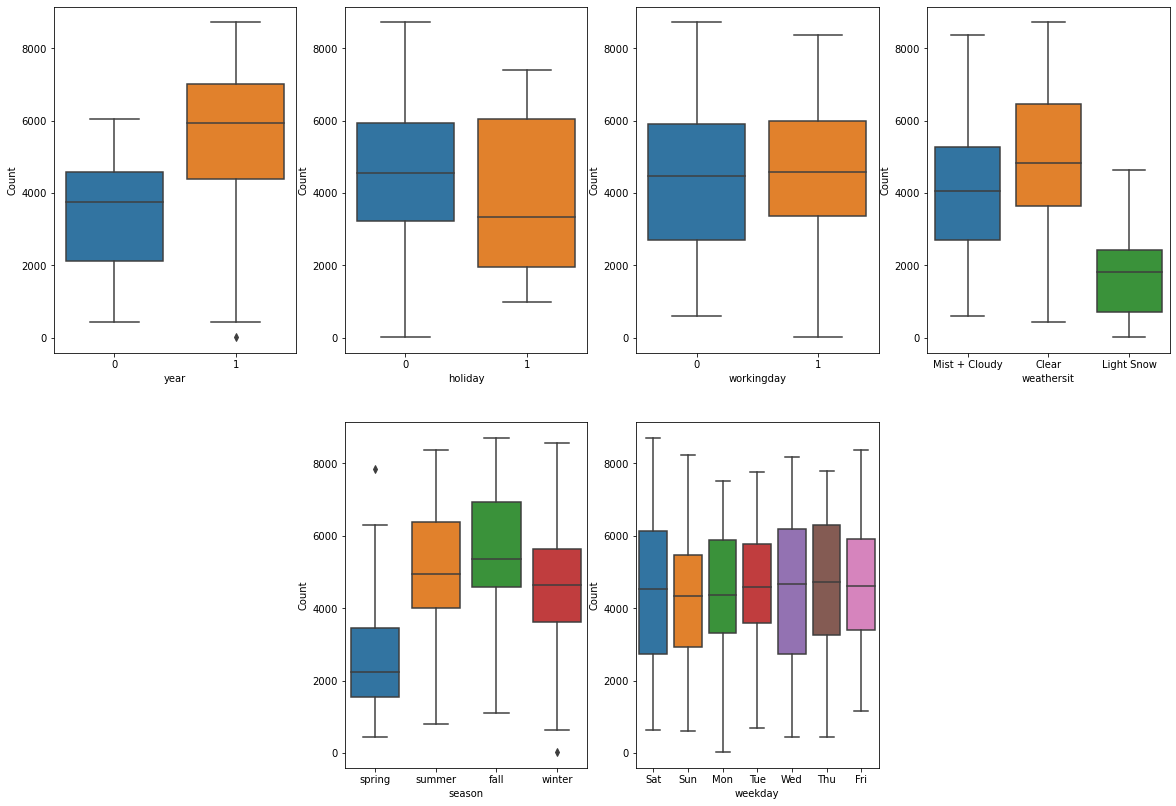

In [11]:
plt.figure(figsize=(20,14))

plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'Count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y= 'Count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y= 'Count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y= 'Count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'Count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'Count', data = bike)

plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

Bike Rentals are more during the Fall season and then in summer

Bike Rentals are more in the year 2019 compared to 2018

Bike Rentals are more in partly cloudy weather

Bike Rentals are more on Saturday,wednesday and thursday

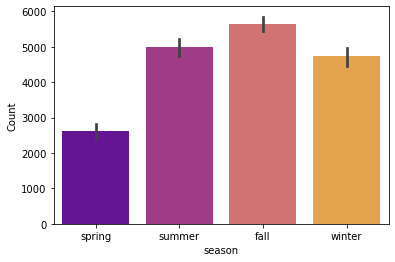

In [12]:
sns.barplot('season','Count',data = bike, palette="plasma")
plt.show()

Bike Rentals are more during the Fall season and then in summer

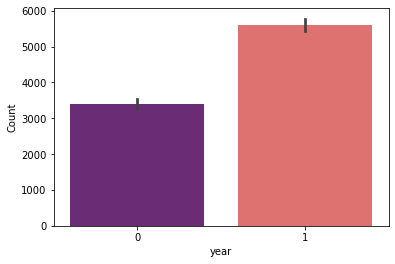

In [13]:
sns.barplot('year','Count',data = bike, palette = "magma")
plt.show()

Bike rentals are more in the year 2019 compared to 2018

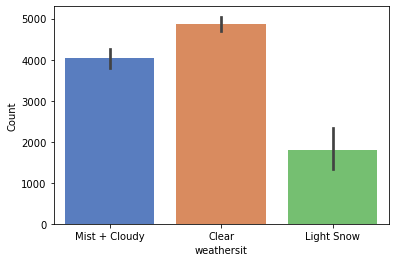

In [14]:
sns.barplot('weathersit','Count',palette="muted",data=bike)
plt.show()

Bike Rentals are more in partly cloudy weather

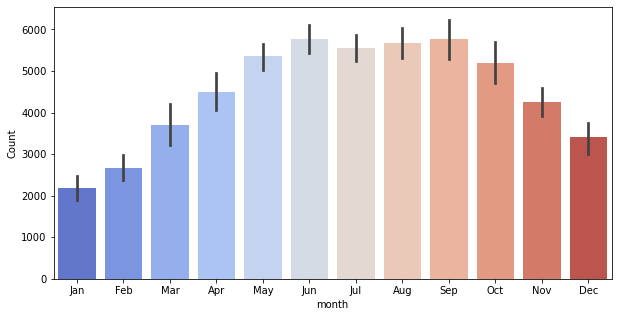

In [15]:
plt.figure(figsize=(10,5))
sns.barplot('month', 'Count', data=bike, palette="coolwarm")
plt.show()

Bike rentals were more in months of June and sept

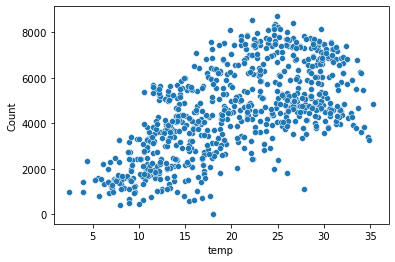

In [16]:
sns.scatterplot(x = 'temp', y = 'Count', data = bike)
plt.show()

Bike Rentals are observed at higher temperatures

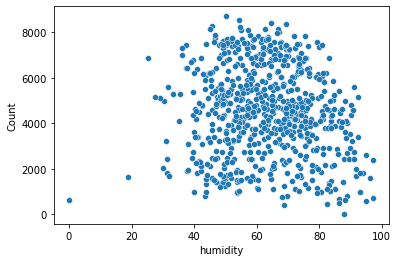

In [17]:
sns.scatterplot(x='humidity', y='Count',data=bike)
plt.show()

Bike rentals more at high humidity

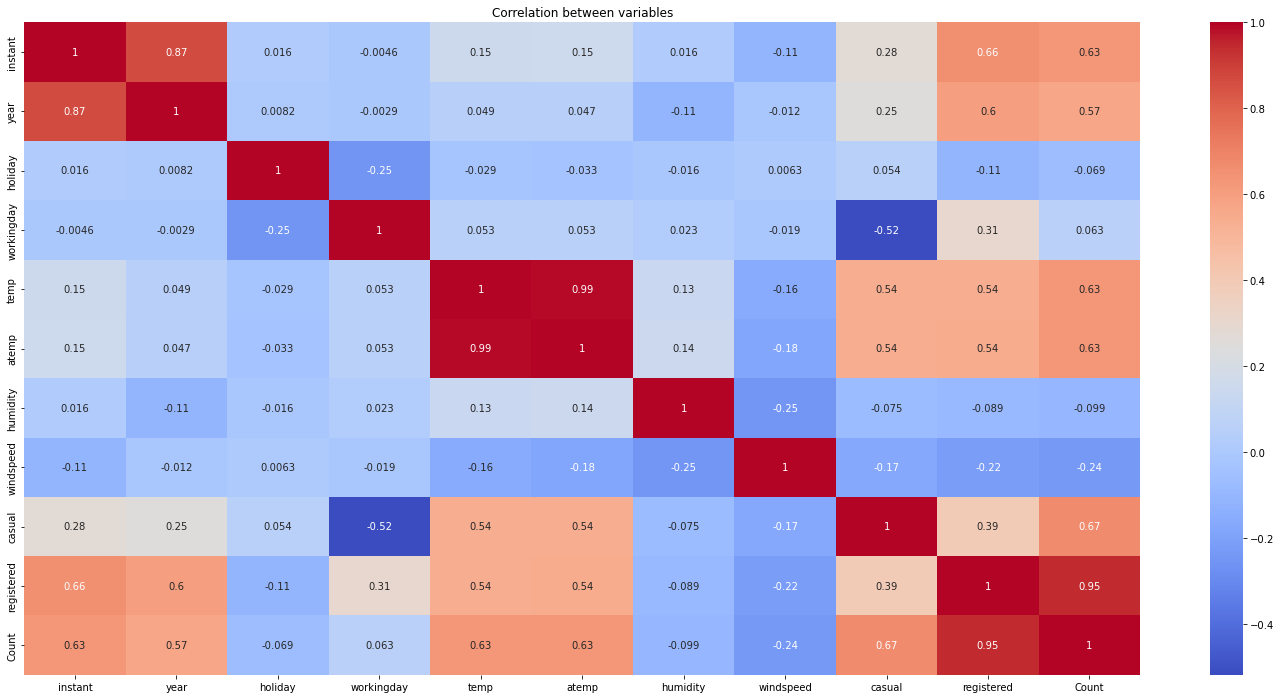

In [18]:
plt.figure(figsize = (25,12))
sns.heatmap(bike.corr(), cmap= "coolwarm", annot = True)
plt.title("Correlation between variables")
plt.show()

As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable

### Drop the unnecessary variables from the dataset

 droping variables instant, dteday, casual, registered

In [19]:
bike = bike.drop(['instant','dteday','casual','registered','atemp'], axis = 1)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [20]:
bike.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
Count           int64
dtype: object

### Data Preparation

In [21]:
months = pd.get_dummies(bike.month,drop_first = True)
weekdays = pd.get_dummies(bike.weekday,drop_first = True)
weather_sit = pd.get_dummies(bike.weathersit,drop_first = True)
seasons = pd.get_dummies(bike.season,drop_first = True)

In [22]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
bike=pd.concat([bike,months,weekdays,weather_sit,seasons], axis = 1 )
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [24]:
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,year,holiday,workingday,temp,humidity,windspeed,Count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [25]:
bike.shape

(730, 29)

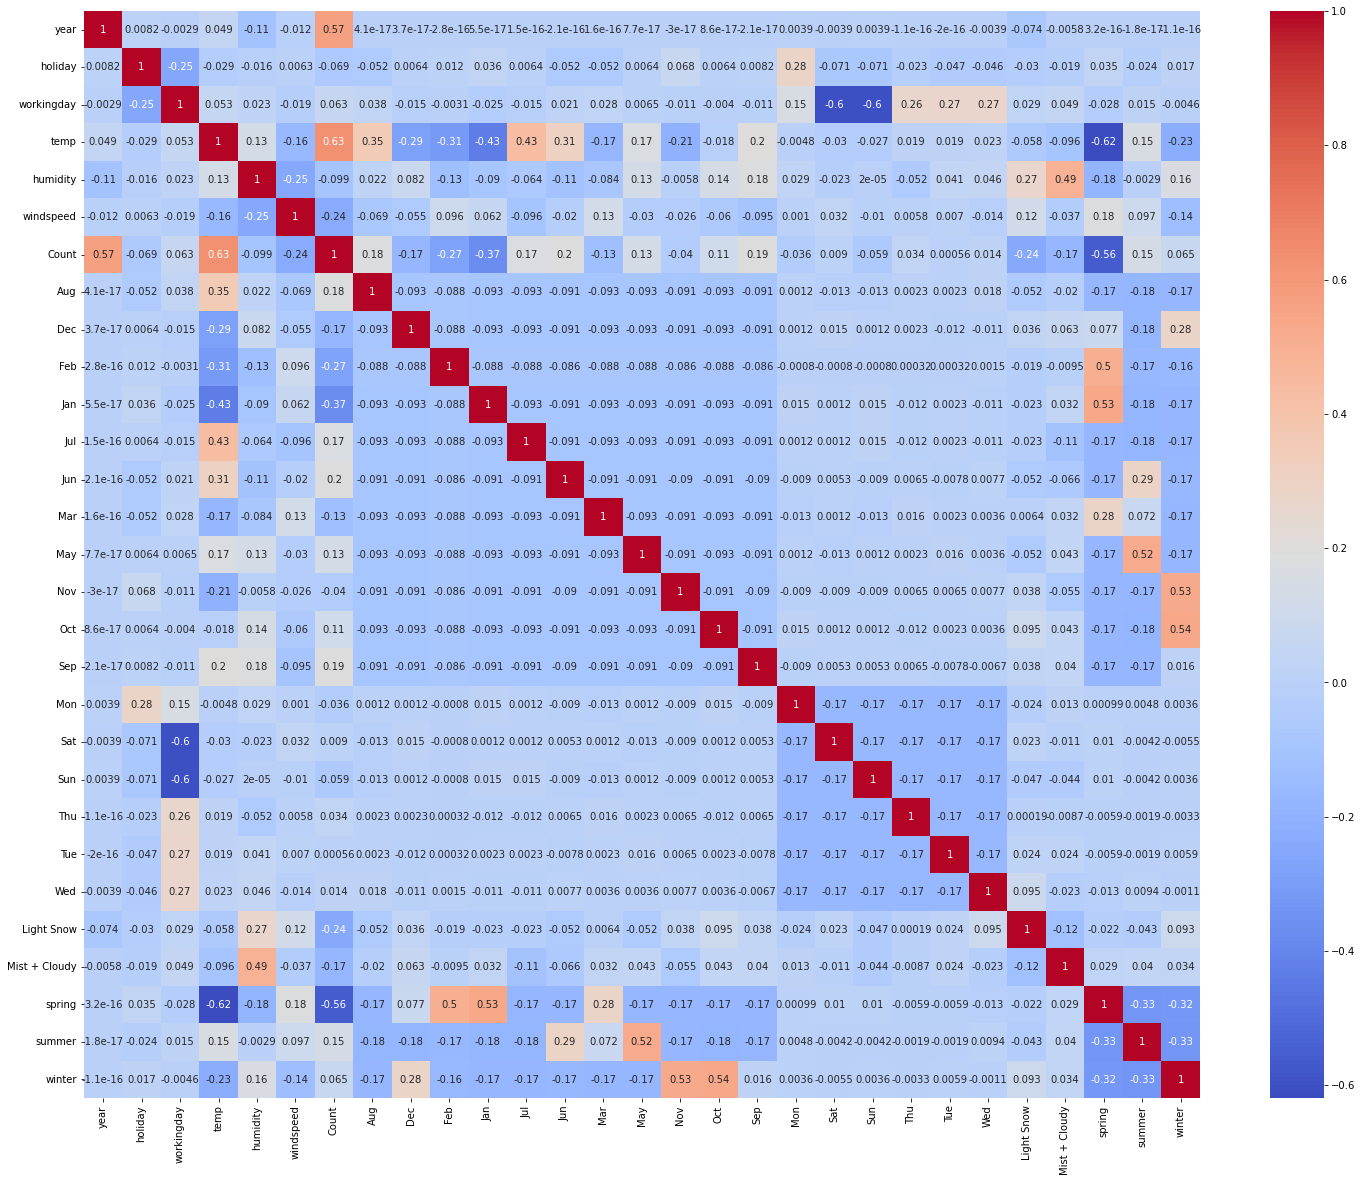

In [26]:
plt.figure(figsize=(25,20))
sns.heatmap(bike.corr(), cmap = "coolwarm", annot = True)
plt.show()

We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

### Splitting data into training and test set

In [27]:
from sklearn.model_selection import train_test_split

bike_train,bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)


In [28]:
bike_train.shape

(510, 29)

In [29]:
bike_test.shape

(220, 29)

### rescaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
num_vars = ['temp','humidity','windspeed','Count']
bike_train[num_vars]= scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,year,holiday,workingday,temp,humidity,windspeed,Count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [32]:
bike_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,Count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1

In [33]:
#Divide the data into X and Y
y_train = bike_train.pop('Count')
X_train = bike_train

### Building the linear Model

##### RFE

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 13),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', False, 12),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jul',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [38]:
X_train_rfe = X_train[col]


In [39]:
import statsmodels.api as sm
X_train_sm= sm.add_constant(X_train_rfe)

In [40]:
#running the linear model

lm= sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          2.11e-191
Time:                        19:28:43   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200      0.000       0.145       0.254
year              0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday        0.0837      0.010      8.665      0.000       0.065       0.103
temp              0.5277      0.033     15.884      0.000       0.462       0.593
humidity         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
Jul              -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0937      0.012      8.040      0.000       0.071       0.117
Sun               0.0406      0.012      3.315      0.001       0.017       0.065
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.14e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,50.68
8,Sat,12.20
9,Sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Mist + Cloudy,1.57


In [42]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)

In [43]:
X_train_sm1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train, X_train_sm1).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          2.11e-191
Time:                        19:28:43   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1811      0.042      4.301      0.000       0.098       0.264
year              0.2298      0.008     28.647      0.000       0.214       0.246
workingday        0.1021      0.025      4.024      0.000       0.052       0.152
temp              0.5277      0.033     15.884      0.000       0.462       0.593
humidity         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
Jul              -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.1121      0.027      4.181      0.000       0.059       0.165
Sun               0.0591      0.027      2.192      0.029       0.006       0.112
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
7,Sat,4.91
11,spring,4.80
8,Sun,4.76
13,winter,3.69
12,summer,3.04
10,Mist + Cloudy,2.31


In [45]:
X_train_rfe = X_train_rfe.drop(['Sun'], axis = 1)

In [46]:
X_train_sm2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train, X_train_sm2).fit()
lm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.54e-191
Time:                        19:28:44   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2307      0.036      6.472      0.000       0.161       0.301
year              0.2300      0.008     28.568      0.000       0.214       0.246
workingday        0.0518      0.011      4.764      0.000       0.030       0.073
temp              0.5278      0.033     15.827      0.000       0.462       0.593
humidity         -0.1594      0.037     -4.253      0.000      -0.233      -0.086
windspeed        -0.1815      0.026     -7.114      0.000      -0.232      -0.131
Jul              -0.0535      0.018     -2.946      0.003      -0.089      -0.018
Sep               0.0799      0.017      4.831      0.000       0.047       0.112
Sat               0.0619      0.014      4.420      0.000       0.034       0.089
Light Snow       -0.2442      0.026     -9.330      0.000      -0.296      -0.193
Mist + Cloudy    -0.0561      0.010     -5.379      0.000      -0.077      -0.036
spring           -0.0566      0.021     -2.740      0.006      -0.097      -0.016
summer            0.0541      0.015      3.640      0.000       0.025       0.083
winter            0.0983      0.017      5.738      0.000       0.065       0.132
==============================================================================
Omnibus:                       71.537   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.647
Skew:                          -0.709   Prob(JB):                     1.32e-40
Kurtosis:                       5.576   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,humidity,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
10,spring,4.18
12,winter,3.39
11,summer,2.84
9,Mist + Cloudy,2.28
0,year,2.08
7,Sat,1.84


In [48]:
X_train_rfe = X_train_rfe.drop(['Jul'], axis = 1)

In [49]:
X_train_sm3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train, X_train_sm3).fit()
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.1
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          7.35e-191
Time:                        19:28:44   Log-Likelihood:                 510.73
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     497   BIC:                            -940.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2176      0.036      6.106      0.000       0.148       0.288
year              0.2307      0.008     28.452      0.000       0.215       0.247
workingday        0.0530      0.011      4.836      0.000       0.031       0.074
temp              0.5126      0.033     15.440      0.000       0.447       0.578
humidity         -0.1524      0.038     -4.044      0.000      -0.227      -0.078
windspeed        -0.1801      0.026     -7.010      0.000      -0.231      -0.130
Sep               0.0942      0.016      5.908      0.000       0.063       0.125
Sat               0.0625      0.014      4.425      0.000       0.035       0.090
Light Snow       -0.2472      0.026     -9.378      0.000      -0.299      -0.195
Mist + Cloudy    -0.0558      0.011     -5.314      0.000      -0.076      -0.035
spring           -0.0449      0.020     -2.200      0.028      -0.085      -0.005
summer            0.0697      0.014      4.991      0.000       0.042       0.097
winter            0.1108      0.017      6.626      0.000       0.078       0.144
==============================================================================
Omnibus:                       78.039   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.198
Skew:                          -0.778   Prob(JB):                     2.49e-43
Kurtosis:                       5.610   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,humidity,28.38
2,temp,15.66
1,workingday,4.72
4,windspeed,4.70
9,spring,4.08
11,winter,3.23
10,summer,2.51
8,Mist + Cloudy,2.28
0,year,2.08
6,Sat,1.84


In [51]:
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

In [52]:
X_train_sm4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train, X_train_sm4).fit()
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.42e-188
Time:                        19:28:44   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1406      0.031      4.597      0.000       0.080       0.201
year              0.2344      0.008     28.655      0.000       0.218       0.250
workingday        0.0555      0.011      4.996      0.000       0.034       0.077
temp              0.4796      0.033     14.678      0.000       0.415       0.544
windspeed        -0.1500      0.025     -6.007      0.000      -0.199      -0.101
Sep               0.0873      0.016      5.423      0.000       0.056       0.119
Sat               0.0667      0.014      4.665      0.000       0.039       0.095
Light Snow       -0.2893      0.025    -11.765      0.000      -0.338      -0.241
Mist + Cloudy    -0.0804      0.009     -9.241      0.000      -0.097      -0.063
spring           -0.0554      0.021     -2.692      0.007      -0.096      -0.015
summer            0.0626      0.014      4.447      0.000       0.035       0.090
winter            0.0958      0.017      5.788      0.000       0.063       0.128
==============================================================================
Omnibus:                       76.073   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.745
Skew:                          -0.765   Prob(JB):                     1.71e-41
Kurtosis:                       5.548   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,Sat,1.83
10,winter,1.76
7,Mist + Cloudy,1.57
4,Sep,1.23


### Residual analysis of train data

In [54]:
X_train_sm4

,const,year,workingday,temp,windspeed,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,0,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,0,1,0


In [55]:
y_train_pred = lm4.predict(X_train_sm4)

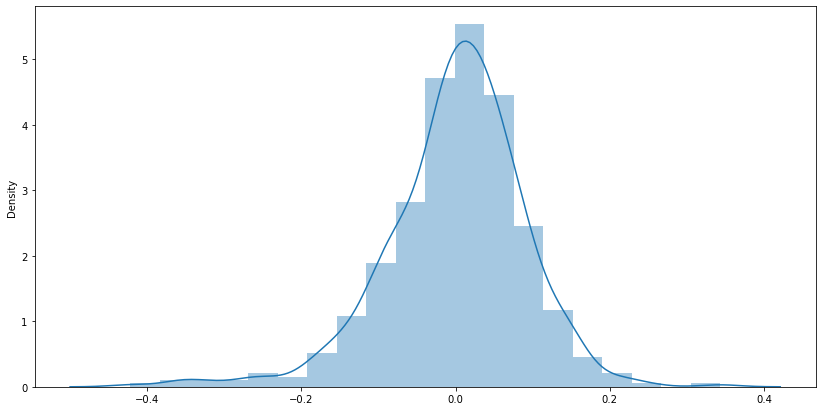

In [57]:
res = y_train - y_train_pred
plt.figure(figsize = (14,7))
sns.distplot(res,bins = 20)
plt.show()

We can see Error terms are normally distributed

### Prediction and evaluation on test set

In [58]:
num_vars = ['temp','humidity','windspeed','Count']
bike_test[num_vars]= scaler.transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,humidity,windspeed,Count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [59]:
y_test = bike_test.pop('Count')
X_test = bike_test

In [60]:
X_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_train_rfe.columns

Index(['year', 'workingday', 'temp', 'windspeed', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [63]:
X_test = X_test[X_train_rfe.columns]

In [64]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,workingday,temp,windspeed,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
184,1.0,0,0,0.831783,0.084219,0,0,0,1,0,0,0
535,1.0,1,1,0.901354,0.153728,0,0,0,0,0,1,0
299,1.0,0,1,0.511964,0.334206,0,0,0,1,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,0,0,0,0,0,1,0


In [65]:
y_test_pred = lm4.predict(X_test_sm)

In [67]:
from sklearn.metrics import r2_score

In [69]:
r2_score(y_true = y_test,y_pred = y_test_pred)

0.8063354998772163

### Model evaluation

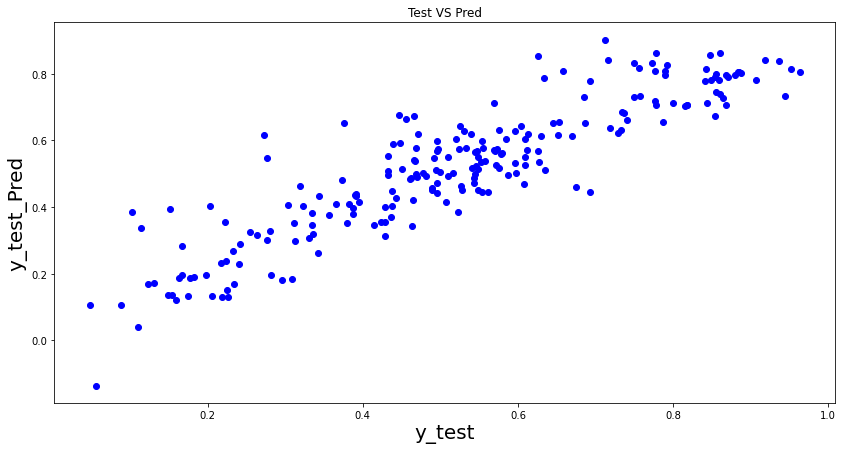

In [73]:
plt.figure(figsize = (14,7))
plt.scatter(y_test,y_test_pred,color = 'blue')
plt.title('Test VS Pred')
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_test_Pred', fontsize = 20)
plt.show()

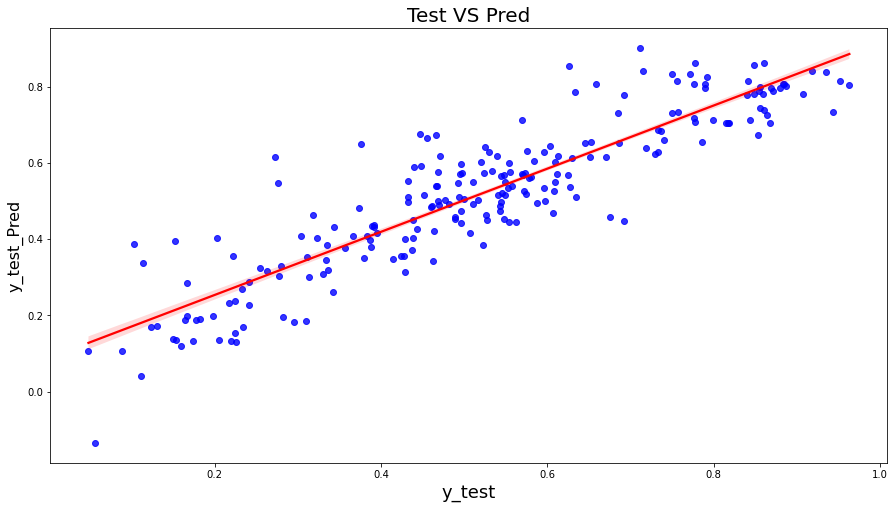

In [76]:
plt.figure(figsize = (15,8))
sns.regplot(x= y_test,y= y_test_pred, ci = 68,fit_reg= True,scatter_kws = {'color' : 'blue'},line_kws = {'color' : 'red'})
plt.title('Test VS Pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_Pred', fontsize = 16)
plt.show()

### Final Result Comparison between Train model and Test:

- Train R^2 : 0.838

- Test R^2: 0.806

- Difference in R^2 between train and test: 3.82%


### Interpretation:

- We arrived at a very decent model for the the demand for shared bikes with the significant variables
- We can see that temperature variable is having the highest coefficient 0.4796, which means if the temperature increases by one unit the number of bike rentals increases by 0.4796 units.

We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow, windspeed variables with negative coefficient. 

### Business Goals:

- A US bike-sharing provider BoomBikes can focus more on Temperature

- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better.

- Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.

- We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand

- Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather... And yes we can give offers